In [1]:
project_folder = r'/content/drive/MyDrive/UCLA Winter 2025/ECE C247/C247-Final-Project' # colab
# project_folder = r'/Users/emilytang/Library/CloudStorage/GoogleDrive-etangs@g.ucla.edu/My Drive/UCLA Winter 2025/ECE C247/C247-Final-Project' #macbook
# project_folder = r'H:\My Drive\UCLA Winter 2025\ECE C247\C247-Final-Project' # PC

# For Running in Google Colab

## Step 0: Define project_folder

### Step 1: Mount the Google Drive

Remember to use GPU runtime before mounting your account. (Runtime --> Change runtime type).

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Step 2: Open the project directory

Replace `Your_Dir` with your own path.

In [ ]:
import os
os.chdir(project_folder)

### Step 3: Install required packages

After installing them, Colab will require you to restart the session.

In [ ]:
!pip install -r requirements.txt

In [ ]:
!python -m emg2qwerty.train \
  user="single_user" \
  trainer.accelerator=gpu trainer.devices=1 trainer.max_epochs=30

2025-03-11 04:32:00.542164: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741667520.820077    3047 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741667520.887733    3047 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-11 04:32:01.469537: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
[2025-03-11 04:32:18,040][__main__][INFO] - 
Config:
user: single_user
dataset:
  train:
  - user: 89335547
    session: 2021

In [ ]:
!python -m emg2qwerty.train \
  user="single_user" \
  checkpoint="/content/drive/MyDrive/UCLA Winter 2025/ECE C247/C247-Final-Project/logs/2025-03-10/23-55-54-Timestretch\ bs32/checkpoints/epoch\=1-step\=240.ckpt" \
  train=False trainer.accelerator=cpu \
  decoder=ctc_greedy \
  hydra.launcher.mem_gb=64

2025-03-11 05:07:24.863490: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741669644.902169   11859 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741669644.913659   11859 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-11 05:07:24.955086: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
[2025-03-11 05:07:33,666][__main__][INFO] - 
Config:
user: single_user
dataset:
  train:
  - user: 89335547
    session: 2021

logs/2025-03-06-TimeStretch/01-24-35/checkpoints/epoch\=28-step\=11136.ckpt

### Step 4: Start your experiments!

- Remember to download the dataset here: `Your_Dir/emg2qwerty-main/data`.
- You may now start your experiments with any scripts.
- Below is an example of single-user training.

# Data Preprocessing

In [ ]:
# project_folder = r'/content/drive/MyDrive/UCLA Winter 2025/ECE C247/C247-Final-Project' # colab
# project_folder = r'/Users/emilytang/Library/CloudStorage/GoogleDrive-etangs@g.ucla.edu/My Drive/UCLA Winter 2025/ECE C247/C247-Final-Project' #macbook
project_folder = r'H:\My Drive\UCLA Winter 2025\ECE C247\C247-Final-Project' # PC

In [ ]:
# %load_ext tensorboard

%reload_ext tensorboard
# %tensorboard --logdir=/Users/emilytang/Library/CloudStorage/GoogleDrive-etangs@g.ucla.edu/My\ Drive/UCLA\ Winter\ 2025/ECE\ C247/C247-Final-Project/logs
%tensorboard --logdir="H:\My Drive\UCLA Winter 2025\ECE C247\C247-Final-Project\logs"

Reusing TensorBoard on port 6006 (pid 406952), started 1 day, 13:36:12 ago. (Use '!kill 406952' to kill it.)

In [ ]:
import os
os.chdir(project_folder)
from scripts import experimental_results
from scripts import convert_to_bids

os.chdir(f'{project_folder}/data')

In [ ]:
import yaml
from pathlib import Path
import matplotlib.pyplot as plt
import h5py # Assuming your EMG data is in HDF5 files.
import numpy as np

def load_yaml_config(filepath):
    with open(filepath, 'r') as file:
        config = yaml.safe_load(file)
    return config


config = load_yaml_config(f"{project_folder}/config/user/single_user.yaml")

train_sessions = [f"{project_folder}/data/{item['session']}.hdf5" for item in config['dataset']['train']]
val_sessions = [f"{project_folder}/data/{item['session']}.hdf5" for item in config['dataset']['val']]
test_sessions = [f"{project_folder}/data/{item['session']}.hdf5" for item in config['dataset']['test']]

In [ ]:
print("Train Sessions:", train_sessions)
print("Validation Sessions:", val_sessions)
print("Test Sessions:", test_sessions)

Train Sessions: ['H:\\My Drive\\UCLA Winter 2025\\ECE C247\\C247-Final-Project/data/2021-06-03-1622765527-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5', 'H:\\My Drive\\UCLA Winter 2025\\ECE C247\\C247-Final-Project/data/2021-06-02-1622681518-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5', 'H:\\My Drive\\UCLA Winter 2025\\ECE C247\\C247-Final-Project/data/2021-06-04-1622863166-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5', 'H:\\My Drive\\UCLA Winter 2025\\ECE C247\\C247-Final-Project/data/2021-07-22-1627003020-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5', 'H:\\My Drive\\UCLA Winter 2025\\ECE C247\\C247-Final-Project/data/2021-07-21-1626916256-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5', 'H:\\My Drive\\UCLA Winter 2025\\ECE C247\\C247-Final-Project/data/2021-07-22-1627004019-keystrokes-dca-study@1-0efbe614-9ae6-4131-9192-4398359b4f5f.hdf5', 'H:\\My Drive\\UCLA Winter 2025\\ECE C247\\C247

In [ ]:
chunk_size = 1000
num_chunks = emg_signal.shape[1] // chunk_size
emg_reshaped = emg_signal[:, :num_chunks * chunk_size].reshape(32, num_chunks, chunk_size).transpose(2, 1, 0)
emg_tensor = torch.from_numpy(emg_reshaped).float()

In [ ]:
import importlib
import emg2qwerty.transforms

importlib.reload(emg2qwerty.transforms)
from emg2qwerty.transforms import *

RAW DATA

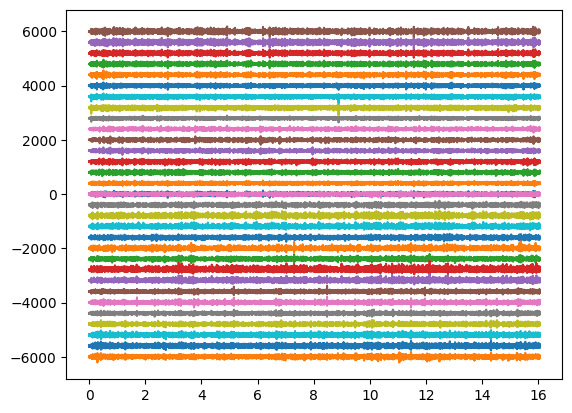

In [ ]:
import torch
import torchaudio
import numpy as np

from scripts import convert_to_bids
from emg2qwerty.transforms import *

file = train_sessions[0]
raw_data = convert_to_bids.get_mne_raw(file)
emg_signal = raw_data.get_data()

hand1_data = emg_signal[:16, :]
hand2_data = emg_signal[16:, :]

for i, channel in enumerate(hand1_data):
    plt.plot(raw_data.times/60, channel+(400*i))

for i, channel in enumerate(hand2_data):
    plt.plot(raw_data.times/60, channel-(400*i))
plt.show()

In [ ]:
import torch
import torchaudio
import numpy as np
import mne
from dataclasses import dataclass

import mne
import torch
from scripts import convert_to_bids
from emg2qwerty.transforms import *

file = train_sessions[0]
raw_data = convert_to_bids.get_mne_raw(file)
emg_signal = raw_data.get_data()

chunk_size = 1000
num_chunks = emg_signal.shape[1] // chunk_size
emg_reshaped = emg_signal[:, :num_chunks * chunk_size].reshape(32, num_chunks, chunk_size).transpose(2, 1, 0)
emg_tensor = torch.from_numpy(emg_reshaped).float()


transform_pipeline = Compose([
    ForEach(RandomBandRotation()), #([1000, 1926, 32])
    LogSpectrogram(n_fft=64, hop_length=16), #([59, 1926, 32, 33])
    # ForEach(TimeStretch()),
    ForEach(SpecAugment()) # ([59, 1926, 32, 33])
])

transformed_emg = transform_pipeline(emg_tensor)

NameError: name 'train_sessions' is not defined

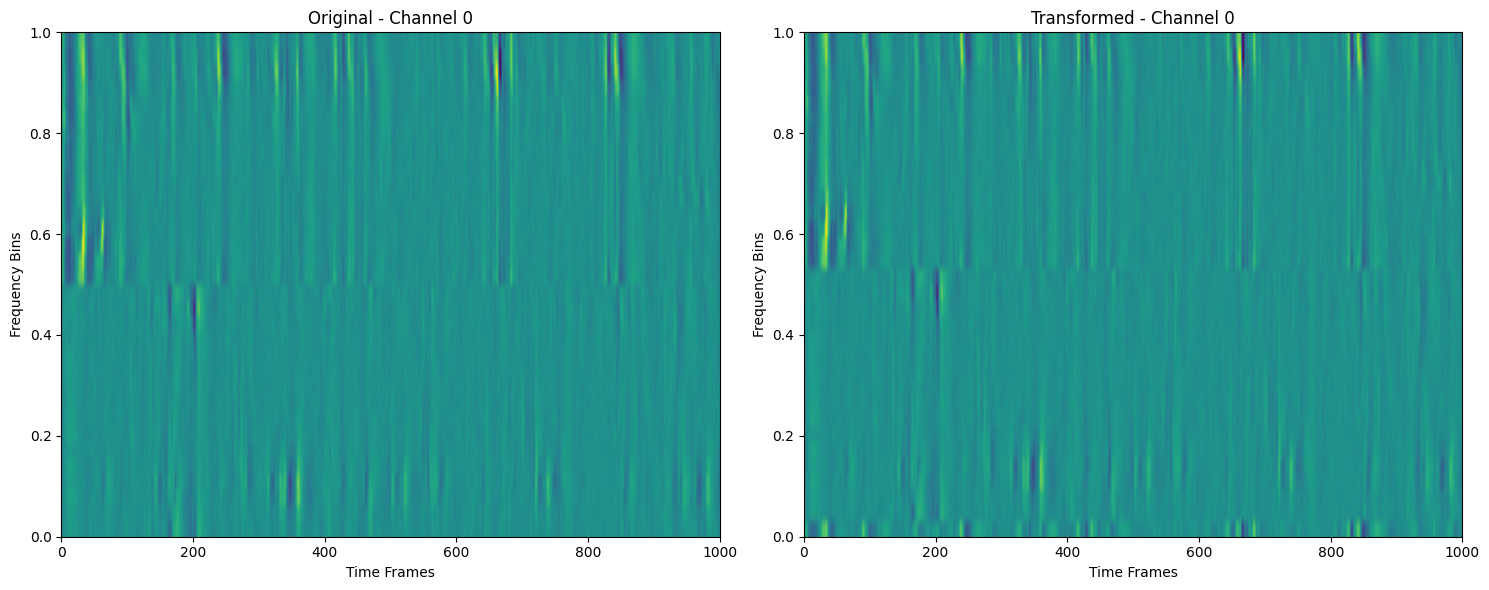

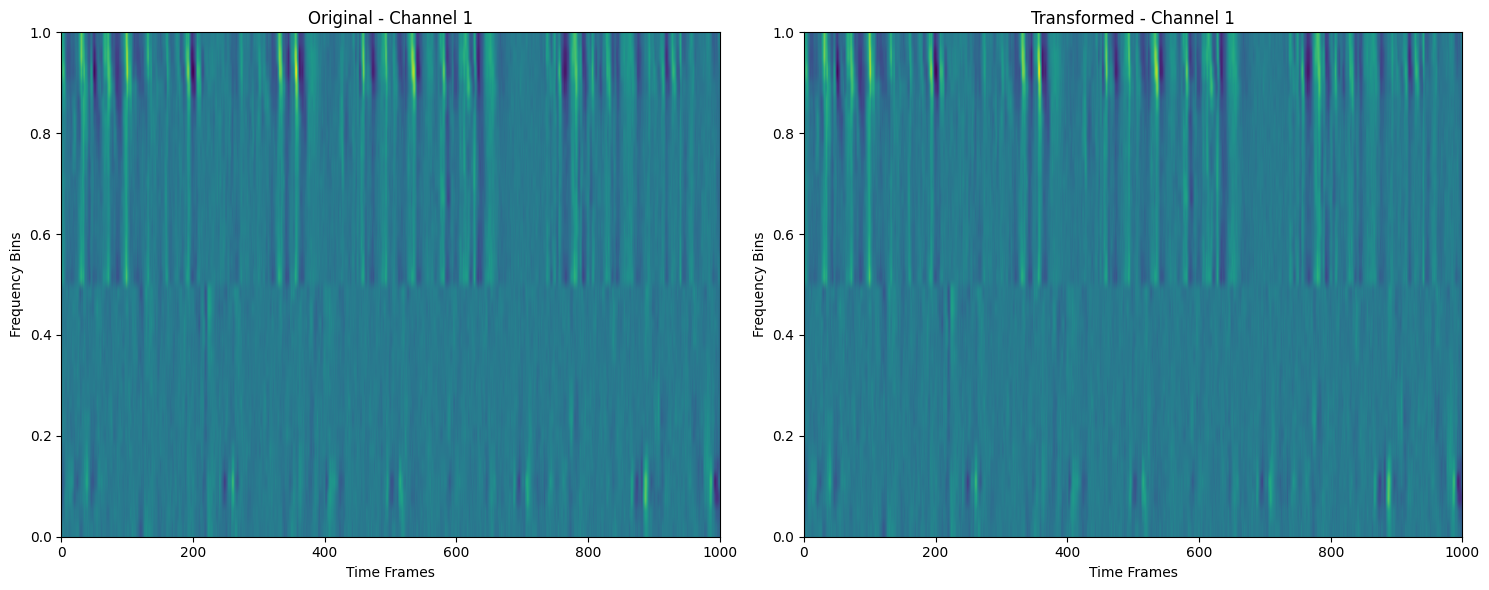

In [ ]:
import matplotlib.pyplot as plt
import torch

# Assuming 'emg_tensor' and 'transformed_emg' are your tensors
# with shape torch.Size([1926, 1000, 32])

def plot_before_and_after(original_tensor, stretched_tensor, batch_index, channel_index):
    """Plots the spectrogram before and after time stretching for a single channel."""

    original_spectrogram = original_tensor[batch_index, 0, channel_index, :].T # Adjusted index
    stretched_spectrogram = stretched_tensor[batch_index, 0, channel_index, :].T # Adjusted index

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Plot original spectrogram
    axes[0].imshow(original_spectrogram, aspect='auto', origin='lower',
                   extent=[0, original_tensor.shape[3], 0, 1]) # Adjusted extent
    axes[0].set_title(f'Original - Channel {channel_index}')
    axes[0].set_xlabel('Time Frames')
    axes[0].set_ylabel('Frequency Bins')

    # Plot stretched spectrogram
    axes[1].imshow(stretched_spectrogram, aspect='auto', origin='lower',
                   extent=[0, stretched_tensor.shape[3], 0, 1]) # Adjusted extent
    axes[1].set_title(f'Transformed - Channel {channel_index}')
    axes[1].set_xlabel('Time Frames')
    axes[1].set_ylabel('Frequency Bins')

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming emg_tensor and transformed_emg have shape [1926, 1000, 32]
# Reshape the tensors to [1, 1, 32, 1000]
emg_tensor_to_plot = emg_tensor.permute(1,0,2).unsqueeze(0).unsqueeze(1)
transformed_emg_to_plot = transformed_emg.permute(1,0,2).unsqueeze(0).unsqueeze(1)

batch_index = 0 # Select the batch item
for channel_index in range(2): # Loop through all 32 channels
    plot_before_and_after(emg_tensor_to_plot, transformed_emg_to_plot, batch_index, channel_index)

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
import torch

# Assuming 'transformed_emg' has the shape [59, 1926, 32, 33]
# Step 1: Reduce the 33rd dimension (if it's frequency slices) by averaging
emg_tensor_reduced = transformed_emg.mean(dim=-1)  # Shape: [59, 1926, 32]

# Step 2: Select a channel (e.g., channel 0) or average across all channels
channel_index = 0  # You can change this to any index from 0 to 31 (since there are 32 channels)

# Select one channel (e.g., channel 0)
emg_single_channel = emg_tensor_reduced[:, :, channel_index]  # Shape: [59, 1926]

# Step 3: Convert to numpy for plotting
emg_single_channel = emg_single_channel.permute(1, 0).numpy()  # Shape: [1926, 59]

# Plot the log spectrogram (before time-stretch)
plt.figure(figsize=(12, 8))
librosa.display.specshow(emg_single_channel, x_axis='time', y_axis='linear', cmap='viridis')
plt.colorbar(label='Log Amplitude')
plt.title(f'Log Spectrogram for Channel {channel_index}')
plt.xlabel('Time Frames')
plt.ylabel('Frequency Bins (Log Scale)')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import librosa.display
import torch

# Assuming 'transformed_emg' has the shape [59, 1926, 32, 33]
# Step 1: Reduce the 33rd dimension (if it's frequency slices) by averaging
emg_tensor_reduced = transformed_emg.mean(dim=-1)  # Shape: [59, 1926, 32]

# Step 2: Select the first 16 channels and the remaining 16 channels
# First 16 channels (channels 0 to 15)
emg_first_half = emg_tensor_reduced[:, :, :16]  # Shape: [59, 1926, 16]
# Remaining 16 channels (channels 16 to 31)
emg_second_half = emg_tensor_reduced[:, :, 16:]  # Shape: [59, 1926, 16]

# Step 3: Convert to numpy for plotting
# For the first half (channels 0 to 15)
# emg_first_half = emg_first_half.permute(1, 0, 2).reshape(1926, 59)  # Shape: [1926, 59]
# # For the second half (channels 16 to 31)
# emg_second_half = emg_second_half.permute(1, 0, 2).reshape(1926, 59)  # Shape: [1926, 59]

# # Plot the first 16 channels
# plt.figure(figsize=(12, 8))
# librosa.display.specshow(emg_first_half.numpy(), x_axis='time', y_axis='log', cmap='viridis')
# plt.colorbar(label='Log Amplitude')
# plt.title('Log Spectrogram (First 16 Channels)')
# plt.xlabel('Time Frames')
# plt.ylabel('Frequency Bins (Log Scale)')
# plt.show()

# # Plot the second 16 channels
# plt.figure(figsize=(12, 8))
# librosa.display.specshow(emg_second_half.numpy(), x_axis='time', y_axis='log', cmap='viridis')
# plt.colorbar(label='Log Amplitude')
# plt.title('Log Spectrogram (Second 16 Channels)')
# plt.xlabel('Time Frames')
# plt.ylabel('Frequency Bins (Log Scale)')
# plt.show()


In [ ]:
%load_ext tensorboard
# %reload_ext tensorboard # reload if you've already loaded
%tensorboard --logdir='H:\My Drive\UCLA Winter 2025\ECE C247\C247-Final-Project'

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6009 (pid 312436), started 3:05:21 ago. (Use '!kill 312436' to kill it.)